In [12]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

plt.rcParams['figure.figsize'] = (15, 10)

In [13]:
conn = sqlite3.connect('../data/sakila.db')

In [14]:
df = pd.read_sql(
    '''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id = customer.customer_id
    INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
    INNER JOIN store ON inventory.store_id = store.store_id
    INNER JOIN address ON store.address_id = address.address_id
    INNER JOIN city ON address.city_id = city.city_id
    INNER JOIN film ON inventory.film_id = film.film_id
    ;
    ''',
    conn, index_col='rental_id', parse_dates=['rental_date', 'return_date']
)

In [15]:
df.head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13
8,2005-05-24 23:31:46,2005-05-27 23:33:46,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G
9,2005-05-25 00:00:40,2005-05-28 00:22:40,SIMPSON,1,Lethbridge,MATRIX SNOWMAN,6,4.99,9.99,PG-13


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [17]:
df.describe

<bound method NDFrame.describe of                   rental_date         return_date customer_lastname  store_id  \
rental_id                                                                       
1         2005-05-24 22:53:30 2005-05-26 22:04:30            HUNTER         1   
2         2005-05-24 22:54:33 2005-05-28 19:40:33           COLLAZO         2   
3         2005-05-24 23:03:39 2005-06-01 22:12:39           MURRELL         2   
4         2005-05-24 23:04:41 2005-06-03 01:43:41             PURDY         1   
5         2005-05-24 23:05:21 2005-06-02 04:33:21            HANSEN         2   
...                       ...                 ...               ...       ...   
16045     2005-08-23 22:25:26 2005-08-25 23:54:26             WHITE         1   
16046     2005-08-23 22:26:47 2005-08-27 18:02:47             KELLY         2   
16047     2005-08-23 22:42:48 2005-08-25 02:48:48             ELLIS         2   
16048     2005-08-23 22:43:07 2005-08-31 21:33:07          HAMILTON        

In [18]:
df.isna().sum()

rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [19]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [20]:
df.film_rental_duration.mean()

4.935489902767389

<AxesSubplot:>

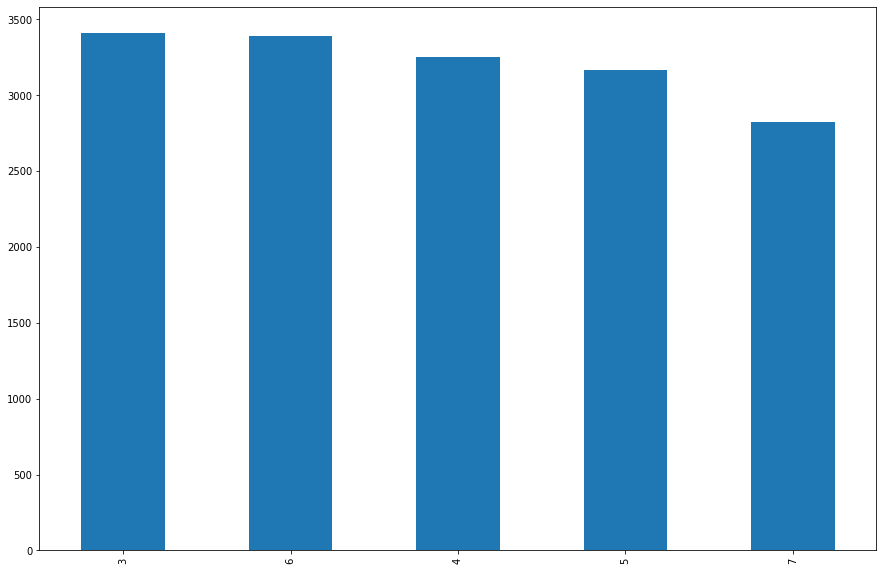

In [21]:
# what is the most common rental duration?
df.film_rental_duration.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='film_rental_duration', ylabel='film_rental_duration'>

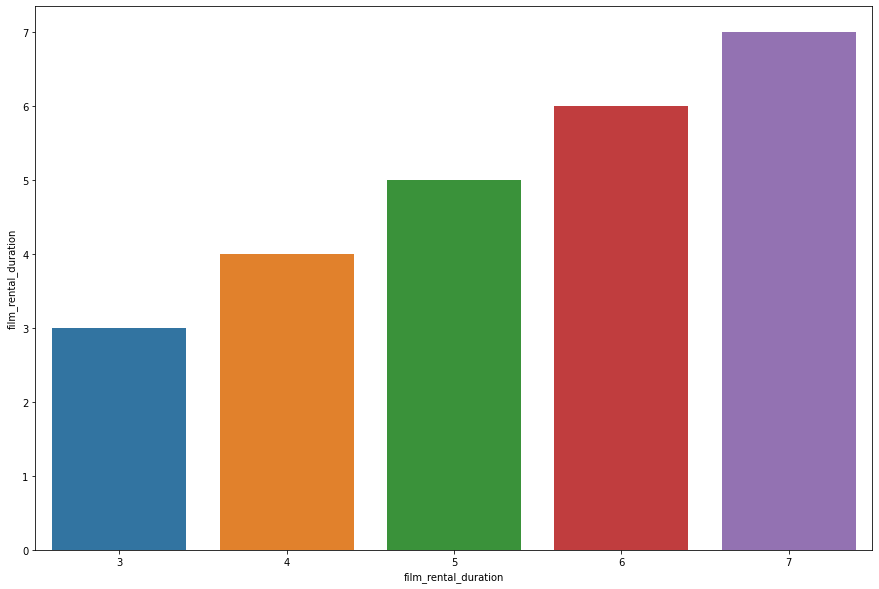

In [25]:
sns.barplot(x='film_rental_duration', y='film_rental_duration', data=df)

In [26]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [28]:
# what is the most common rental rate?
df.film_rental_rate.mean()

2.9426302667663933

<AxesSubplot:ylabel='film_rental_rate'>

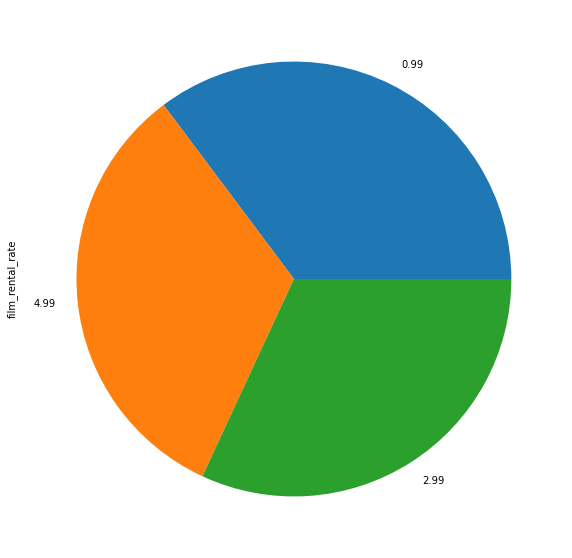

In [30]:
df.film_rental_rate.value_counts().plot(kind='pie')

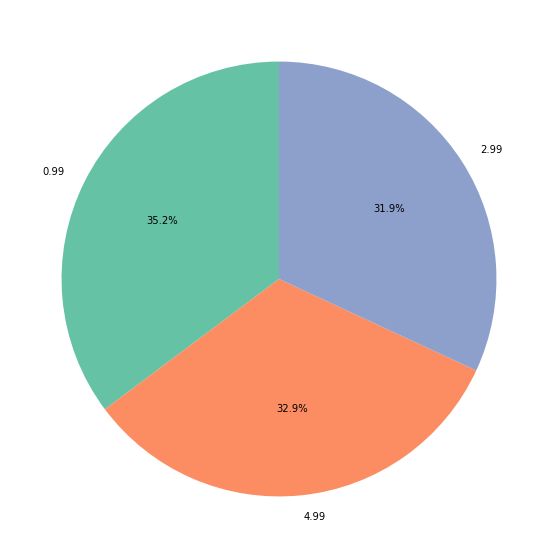

In [32]:
colors = sns.color_palette('Set2', n_colors=3)
plt.pie(df.film_rental_rate.value_counts(),
        labels=df.film_rental_rate.value_counts().index,
        colors=colors, autopct='%1.1f%%', startangle=90
)
plt.show()

<AxesSubplot:>

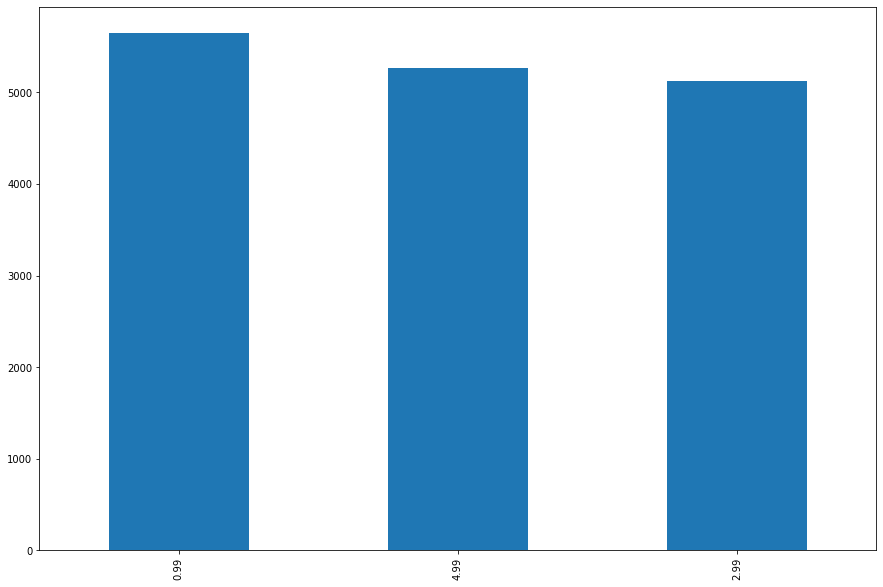

In [31]:
df.film_rental_rate.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='film_rental_rate'>

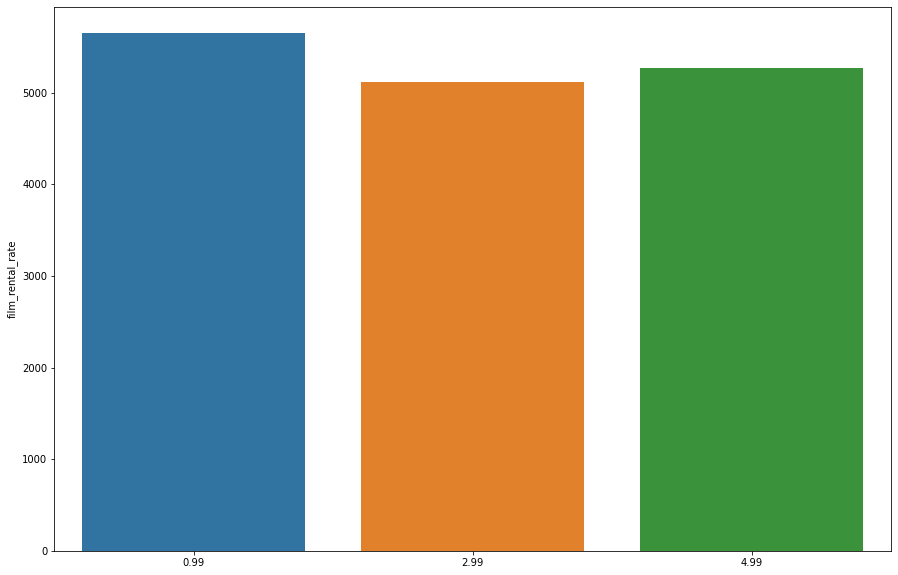

In [35]:
sns.barplot(x=df.film_rental_rate.value_counts().index, y=df.film_rental_rate.value_counts(), data=df)

In [37]:
# how is the replacement cost distributed?
df.film_replacement_cost

rental_id
1        21.99
2        16.99
3        14.99
4        21.99
5        29.99
         ...  
16045    23.99
16046    28.99
16047    15.99
16048    28.99
16049    25.99
Name: film_replacement_cost, Length: 16044, dtype: float64

<AxesSubplot:xlabel='film_replacement_cost'>

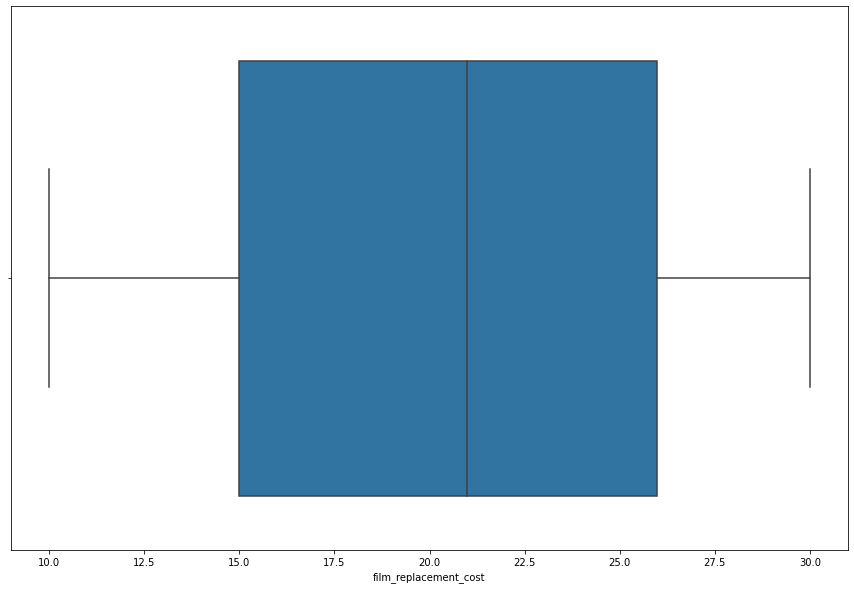

In [43]:
sns.boxplot(x='film_replacement_cost', data=df)

<AxesSubplot:>

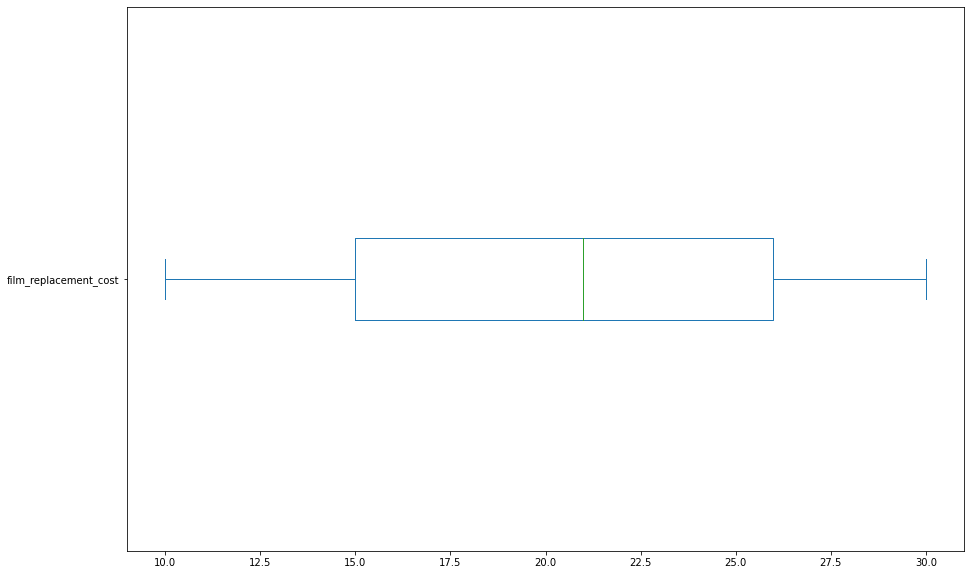

In [42]:
df.film_replacement_cost.plot(kind='box', vert=False)

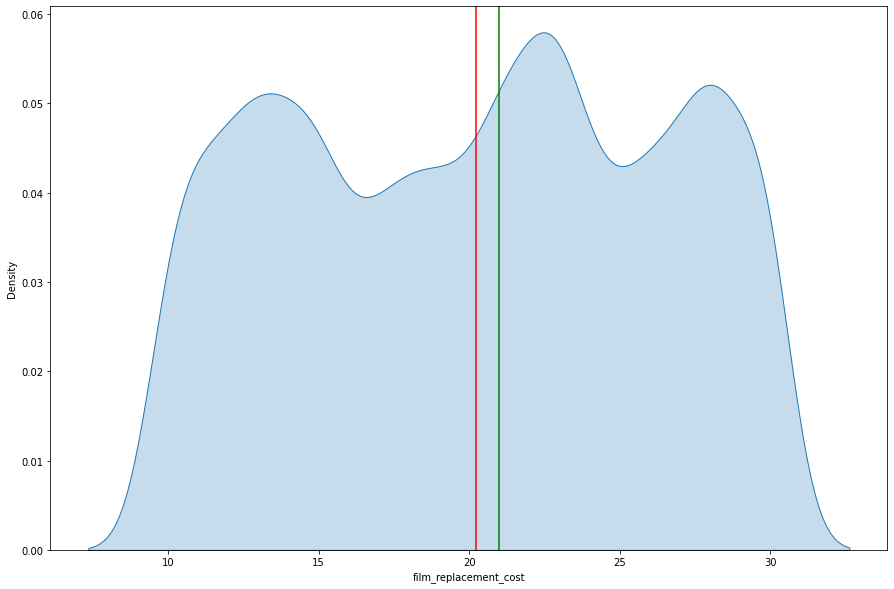

In [41]:
ax = sns.kdeplot(df.film_replacement_cost, shade=True)
ax.axvline(df.film_replacement_cost.mean(), color='r')
ax.axvline(df.film_replacement_cost.median(), color='g')

In [44]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating'],
      dtype='object')

In [45]:
# how many fiilms of each rating are available?
df.film_rating.value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<AxesSubplot:>

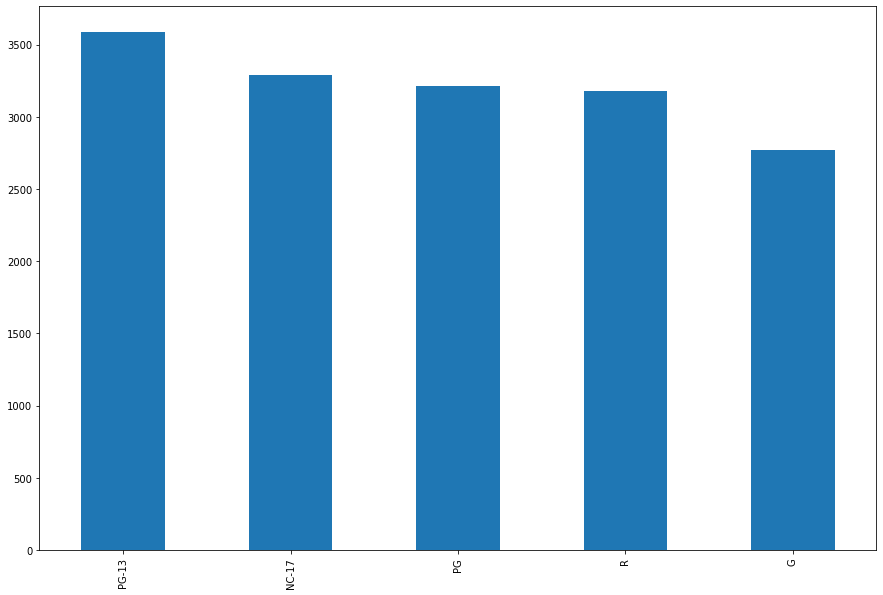

In [46]:
df.film_rating.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='film_rating'>

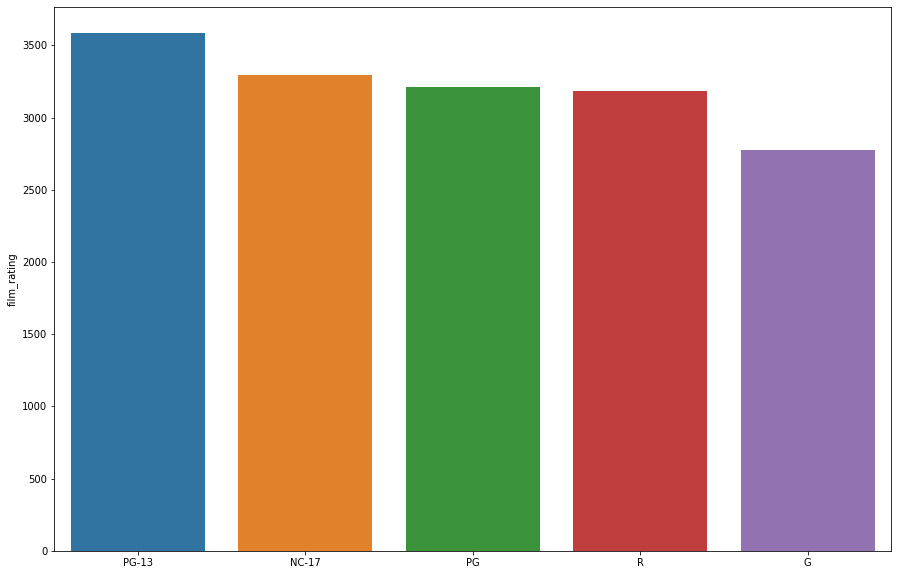

In [47]:
sns.barplot(x=df.film_rating.value_counts().index, y=df.film_rating.value_counts(), data=df)

<AxesSubplot:xlabel='film_rating', ylabel='film_replacement_cost'>

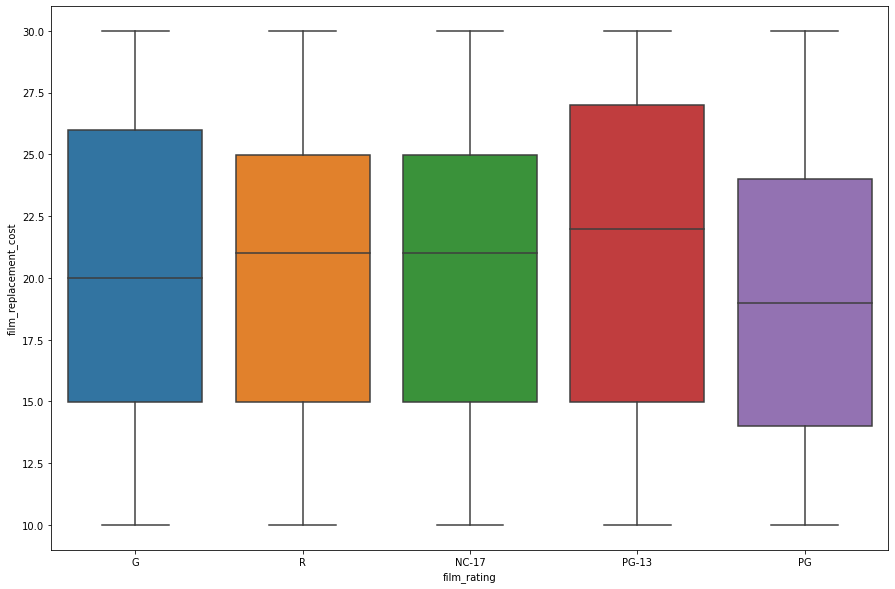

In [48]:
# does the film replacememt cost vary by rating?
sns.boxplot(x='film_rating', y='film_replacement_cost', data=df)

In [49]:
df['rental_days'] = (df.return_date - df.rental_date).dt.days

In [51]:
df.rental_days.head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

In [52]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,1.0
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,3.0
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,7.0
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,9.0
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,8.0


In [53]:
df.rental_days.mean()

4.525944139713763

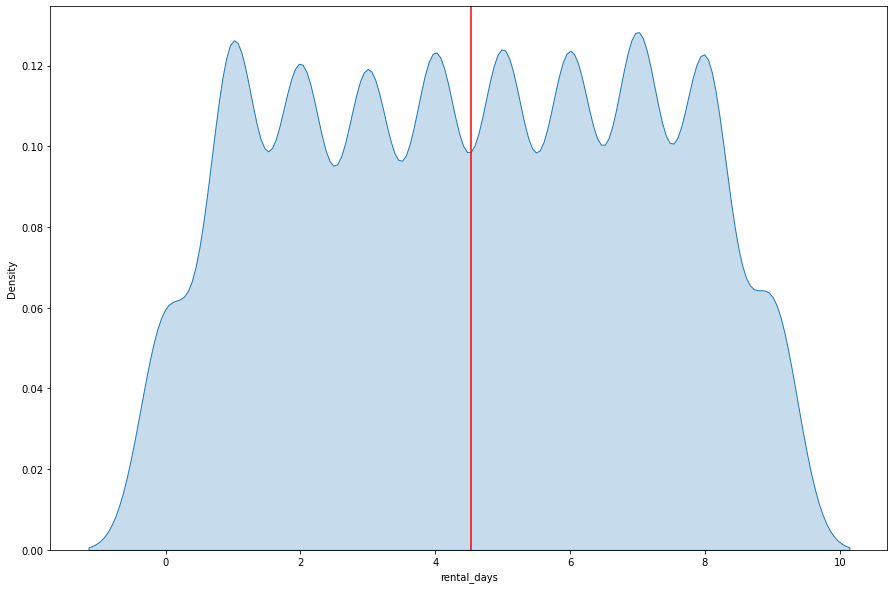

In [55]:
ax = sns.kdeplot(df.rental_days, shade=True)
ax.axvline(df.rental_days.mean(), color='r')

In [56]:
# add an calculate a new film daily rental rate column
df['film_daily_rental_rate'] = df.film_rental_rate / df.film_rental_duration

In [58]:
df.film_daily_rental_rate.head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [59]:
df.film_daily_rental_rate.mean()

0.6458262471655329

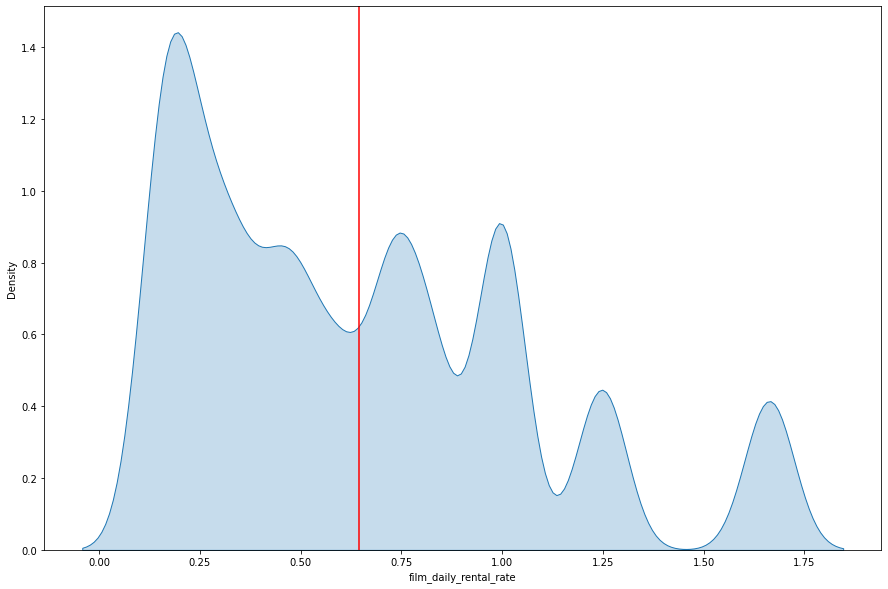

In [61]:
ax = sns.kdeplot(df.film_daily_rental_rate, shade=True)
ax.axvline(df.film_daily_rental_rate.mean(), color='r')

In [66]:
# list the 10 films with the lowest daily rental rate
df.sort_values('film_daily_rental_rate', ascending=True).head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
14877,2005-08-22 03:39:56,2005-08-24 03:41:56,HERRERA,1,Lethbridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,2.0,0.141429
5734,2005-07-10 11:37:28,2005-07-16 11:10:28,BOWENS,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,5.0,0.141429
11899,2005-08-17 15:29:12,2005-08-24 17:41:12,PERRY,2,Woodridge,PRIMARY GLASS,7,0.99,16.99,G,7.0,0.141429
4210,2005-07-07 11:36:20,2005-07-16 12:38:20,WOFFORD,2,Woodridge,HOOK CHARIOTS,7,0.99,23.99,G,9.0,0.141429
7215,2005-07-27 09:24:00,2005-08-05 07:37:00,OLIVARES,2,Woodridge,MOON BUNCH,7,0.99,20.99,PG,8.0,0.141429
1268,2005-06-15 07:29:30,2005-06-23 12:36:30,BURNS,1,Lethbridge,SIEGE MADRE,7,0.99,23.99,R,8.0,0.141429
7229,2005-07-27 10:00:54,2005-07-28 13:58:54,LANE,2,Woodridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,1.0,0.141429
7231,2005-07-27 10:01:51,2005-08-05 13:38:51,LONG,2,Woodridge,GILBERT PELICAN,7,0.99,13.99,G,9.0,0.141429
7235,2005-07-27 10:09:30,2005-08-05 11:44:30,NGO,1,Lethbridge,EMPIRE MALKOVICH,7,0.99,26.99,G,9.0,0.141429


In [65]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [67]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
13,2005-05-25 00:22:55,2005-05-30 04:28:55,MCWHORTER,1,Lethbridge,KING EVOLUTION,3,4.99,24.99,NC-17,5.0,1.663333
40,2005-05-25 05:09:04,2005-05-27 23:12:04,YEE,1,Lethbridge,MINDS TRUMAN,3,4.99,22.99,PG-13,2.0,1.663333
68,2005-05-25 09:47:31,2005-05-31 10:20:31,ORTIZ,2,Woodridge,TEEN APOLLO,3,4.99,25.99,G,6.0,1.663333
106,2005-05-25 18:18:19,2005-06-04 00:01:19,AUSTIN,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,9.0,1.663333
116,2005-05-25 19:27:51,2005-05-26 16:23:51,GARCIA,1,Lethbridge,WIFE TURN,3,4.99,27.99,NC-17,0.0,1.663333
124,2005-05-25 20:46:11,2005-05-30 00:47:11,MENDOZA,1,Lethbridge,BACKLASH UNDEFEATED,3,4.99,24.99,PG-13,4.0,1.663333
135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333
152,2005-05-26 00:41:10,2005-06-03 06:05:10,MORGAN,1,Lethbridge,MIDSUMMER GROUNDHOG,3,4.99,27.99,G,8.0,1.663333
155,2005-05-26 01:15:05,2005-06-01 00:03:05,BARBEE,2,Woodridge,BEHAVIOR RUNAWAY,3,4.99,20.99,PG,5.0,1.663333


In [68]:
df.columns

Index(['rental_date', 'return_date', 'customer_lastname', 'store_id',
       'rental_store_city', 'film_title', 'film_rental_duration',
       'film_rental_rate', 'film_replacement_cost', 'film_rating',
       'rental_days', 'film_daily_rental_rate'],
      dtype='object')

In [69]:
df.rental_store_city.unique()

array(['Lethbridge', 'Woodridge'], dtype=object)

In [71]:
# how many rentals were made in each city?
df.loc[df.rental_store_city == 'Lethbridge'].shape[0]

7923

In [72]:
df.loc[df.rental_store_city == 'Woodridge'].shape[0]

8121

In [76]:
# how many rentals of each film rating were made in Lethbridge city?
lethbridge_rentals_per_rating = df.loc[df.rental_store_city == 'Lethbridge', 'film_rating'].value_counts()
print(lethbridge_rentals_per_rating)

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64


<AxesSubplot:ylabel='film_rating'>

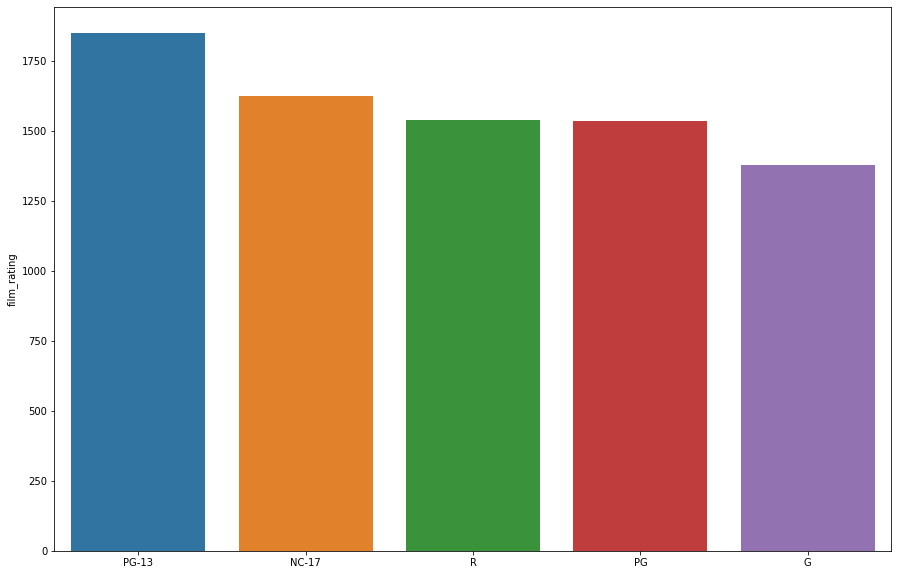

In [77]:
sns.barplot(x=lethbridge_rentals_per_rating.index, y=lethbridge_rentals_per_rating, data=df)

In [79]:
# how many rentals were made in Woodridge city with duration higher than 5 days?
df.loc[(df.rental_store_city == 'Woodridge') & (df.rental_days > 5)].shape[0]

3125

In [80]:
# how many rentals were made at the store with id 2 or with replacement cost lower than 10.99?
df.loc[(df.store_id == 2) | (df.film_replacement_cost < 10.99)].shape[0]

8444